In [2]:
import pandas as pd 
import numpy as np
import netCDF4
import xarray as xr 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
sol = xr.open_dataset('ERA5-Algeria_solar-4.nc') #2011-01-01T00:00 to 2018-12-31T21:00

In [4]:
w4 = np.sqrt(np.square(wind4.u100)+np.square(wind4.v100))wind4 = xr.open_dataset('ERA5-Algeria_wind-4.nc') #2011-01-01T00:00 to 2018-12-31T21:00

In [5]:
w4 = np.sqrt(np.square(wind4.u100)+np.square(wind4.v100))

In [6]:
sol = sol.ssrd/3600

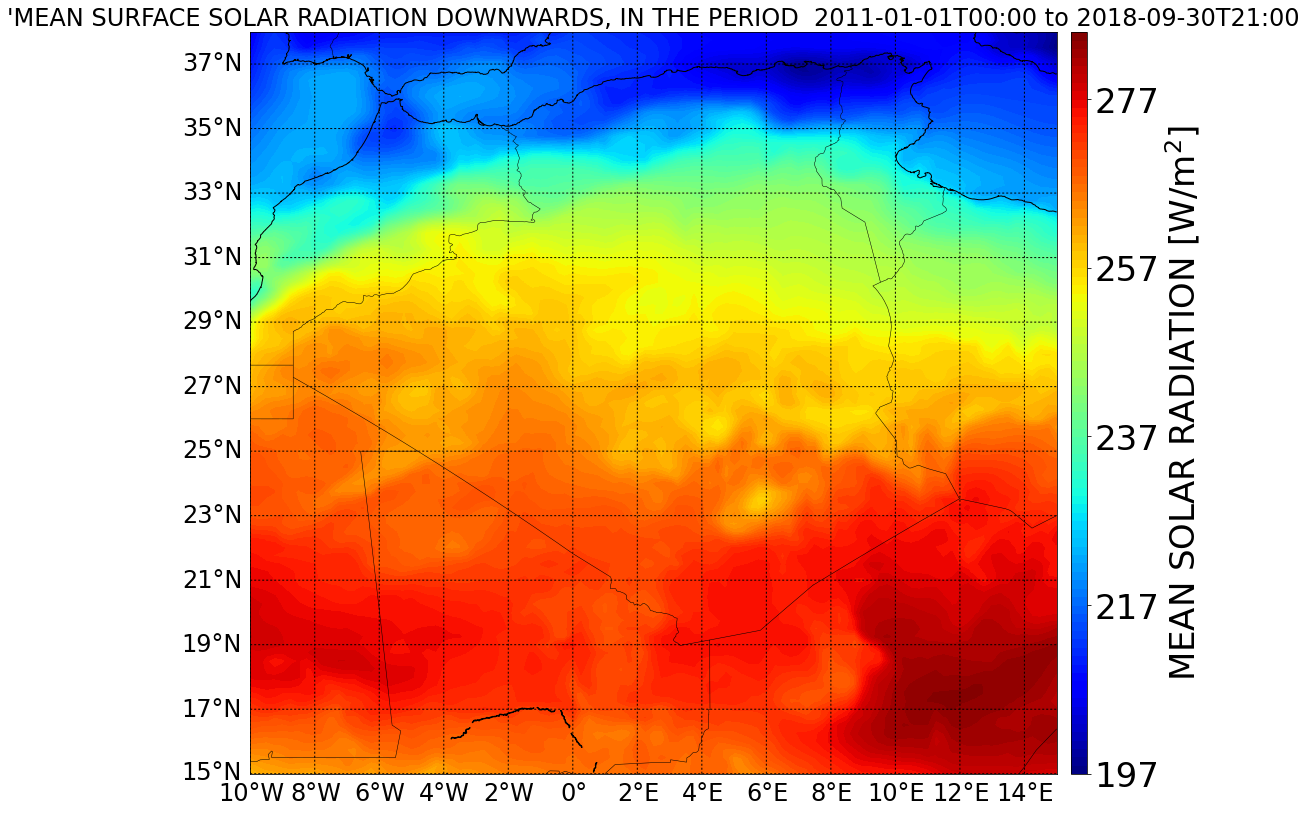

In [7]:
solarmean = sol.mean(dim=['time'])
#----------------------------------------------
smax = solarmean.max()
smin = solarmean.min()
#----------------------------------------------
plt.figure(figsize=(15,15))
m = Basemap(projection='cyl',llcrnrlat=15.,urcrnrlat=38.,llcrnrlon=-10.,urcrnrlon=15.,\
            #lat_1=20.,lat_2=40.,lat_0=30.,lon_0=232.
            resolution ='h',area_thresh=1000.)
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
#m.drawmapboundary()
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(15,40,2),dashes=[2,2],labels=[1,0,0,0],fontsize=24)
m.drawmeridians(np.arange(-10,15,2),dashes=[2,2],labels=[0,0,0,1],fontsize=24)
xpt,ypt = m(solarmean.longitude,solarmean.latitude)

X,Y = np.meshgrid(np.linspace(xpt[0],xpt[100],101),np.linspace(ypt[0],ypt[92],93))
im1 = m.contourf(X,Y,solarmean,100,cmap=plt.cm.jet,latlon="True")
cb = m.colorbar(im1,"right",  size="2%", ticks=np.arange(int(smin), int(smax), 20), pad=0.2)

#plt.plot(-3.75, 33.75, '*',color='white',markersize=10)

cb.set_label(r"MEAN SOLAR RADIATION [W/m$^{2}$]", size=34)
cb.ax.tick_params(labelsize=34)

plt.title("'MEAN SURFACE SOLAR RADIATION DOWNWARDS, IN THE PERIOD  2011-01-01T00:00 to 2018-09-30T21:00", size=24)
#print(s)
plt.show();


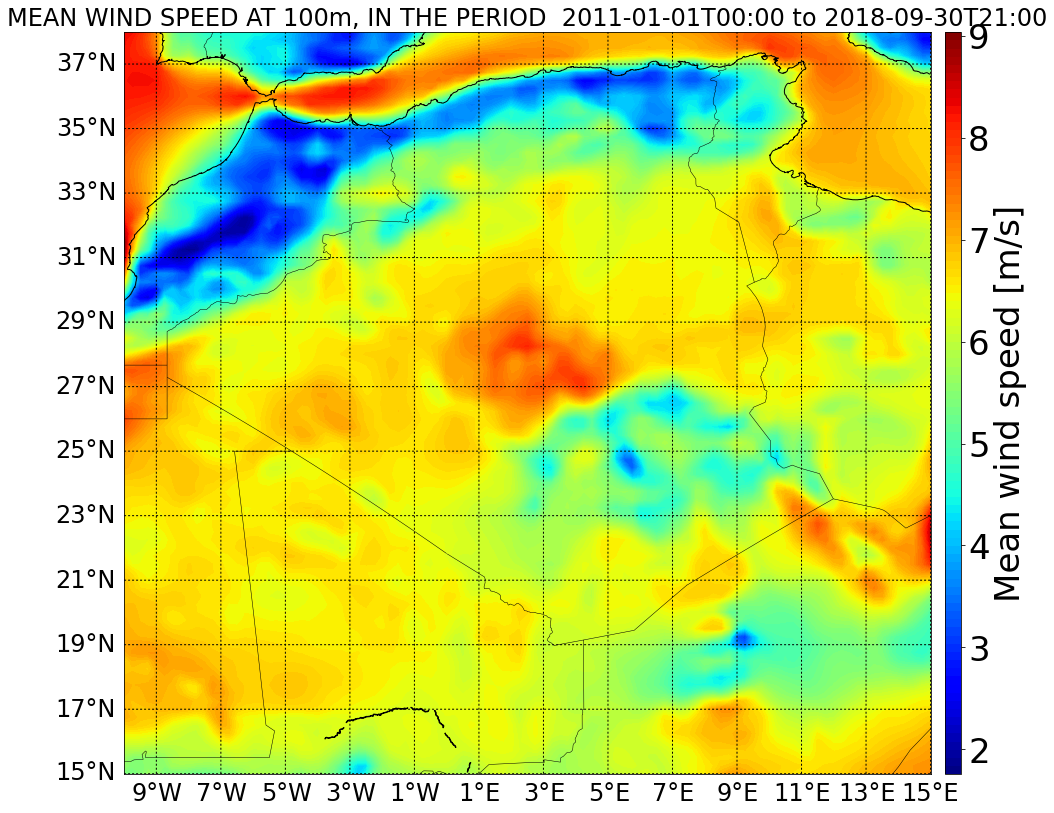

In [8]:
#----------------------------------------------
windmean = w4.mean(dim=['time'])
#----------------------------------------------
plt.figure(figsize=(15,15))
m = Basemap(projection='cyl',llcrnrlat=15.,urcrnrlat=38.,llcrnrlon=-10.,urcrnrlon=15.,\
            #lat_1=20.,lat_2=40.,lat_0=30.,lon_0=232.
            resolution ='h',area_thresh=1000.)
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
#m.drawmapboundary()
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(15,40,2),dashes=[2,2],labels=[1,0,0,0],fontsize=24)
m.drawmeridians(np.arange(-15,20,2),dashes=[2,2],labels=[0,0,0,1],fontsize=24)
xpt,ypt = m(windmean.longitude,windmean.latitude)

X,Y = np.meshgrid(np.linspace(xpt[0],xpt[100],101),np.linspace(ypt[0],ypt[92],93))
im1 = m.contourf(X,Y,windmean,100,cmap=plt.cm.jet,latlon="True")
cb = m.colorbar(im1,"right",  size="2%", ticks=np.arange(0, 9.1, 1), pad=0.2)

#plt.plot(-3.75, 33.75, '*',color='white',markersize=10)

cb.set_label(r"Mean wind speed [m/s]", size=34)
cb.ax.tick_params(labelsize=34)

plt.title("MEAN WIND SPEED AT 100m, IN THE PERIOD  2011-01-01T00:00 to 2018-09-30T21:00", size=24)
#print(s)
plt.show();


In [9]:
tlat=93 
tlon=101
rc = np.zeros((93,101))
lat = 38.25
for i in range(0,tlat):
    lat=lat-0.25
    lon = -10.25
    for j in range(0,tlon):
        lon = lon +0.25
        si = sol.sel(latitude=lat, longitude=lon, time=slice('2011-01-01T00:00','2018-09-30T21:00:00'))
        wi = w4.sel(latitude=lat, longitude=lon, time=slice('2011-01-01T00:00','2018-09-30T21:00.00'))
        r = np.corrcoef(si, wi)
        r = r[0,1]         
        rc[i,j]=r


In [10]:
pearson_w_s = xr.DataArray(rc, [("latitude", np.linspace(38, 15, 93)),("longitude", np.linspace(-10, 15, 101))]) 

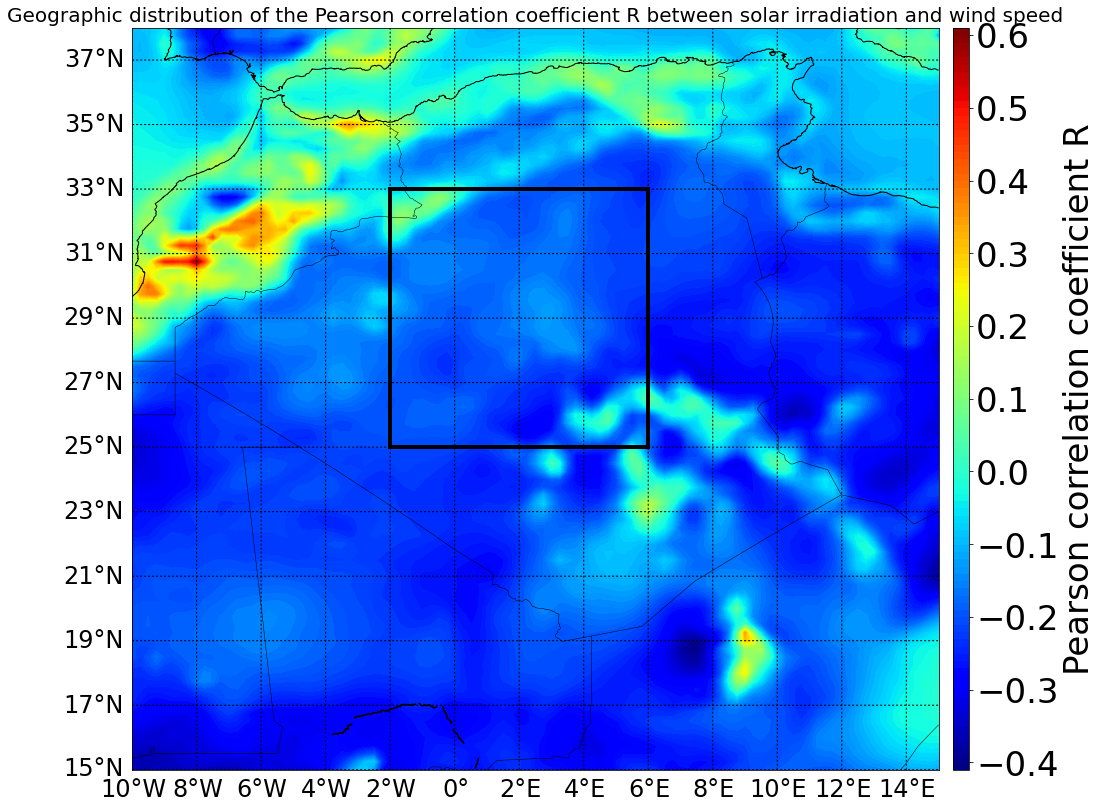

In [12]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(15,15))
m = Basemap(projection='cyl',llcrnrlat=15.,urcrnrlat=38.,llcrnrlon=-10.,urcrnrlon=15.,\
            #lat_1=20.,lat_2=40.,lat_0=30.,lon_0=232.
            resolution ='h',area_thresh=1000.)
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
#m.drawmapboundary()
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(15,40,2),dashes=[2,2],labels=[1,0,0,0],fontsize=24)
m.drawmeridians(np.arange(-10,15,2),dashes=[2,2],labels=[0,0,0,1],fontsize=24)
xpt,ypt = m(pearson_w_s.longitude,pearson_w_s.latitude)

X,Y = np.meshgrid(np.linspace(xpt[0],xpt[100],101),np.linspace(ypt[0],ypt[92],93))
im1 = m.contourf(X,Y,pearson_w_s,100,cmap=plt.cm.jet,latlon="True")
cb = m.colorbar(im1,"right",  size="2%", ticks=np.arange(-1, 1, 0.1), pad=0.2)

plt.gca().add_patch(Rectangle((-2,25),8,8, edgecolor='black', facecolor='none', lw=4))

cb.set_label(r"Pearson correlation coefficient R", size=34)
cb.ax.tick_params(labelsize=34)
plt.title('Geographic distribution of the Pearson correlation coefficient R between solar irradiation and wind speed', size=20)
plt.show();


In [13]:
#In Salah region_________Import data
sol1 = xr.open_dataset('ERA5-Sahara_sol+wind100_2007-2010.nc')  #2007-01-01T00:00:00   to   2010-12-31T23:00:00
sol2 = xr.open_dataset('ERA5-Sahara_sol+wind100_2011-2014.nc')  #2011-01-01T00:00:00   to   2014-12-31T23:00:00
sol3 = xr.open_dataset('ERA5-Sahara_sol+wind100_2015-2018.nc')  #2018-12-31T22:00:00   to   2018-12-31T23:00:00

In [14]:
#merge three datasets
wos = xr.merge([sol1, sol2, sol3])

In [15]:
s0 = wos.ssrd
w0 = np.sqrt(np.square(wos.u100)+np.square(wos.v100))

In [16]:
#In Salah

tlat=33 
tlon=33
rc = np.zeros((33,33))
lat = 33.25
for i in range(0,tlat):
    lat=lat-0.25
    lon = -2.25
    for j in range(0,tlon):
        lon = lon +0.25
        si = s0.sel(latitude=lat, longitude=lon, time=slice('2007-01-01T00:00','2018-09-30T23:00:00'))
        wi = w0.sel(latitude=lat, longitude=lon, time=slice('2007-01-01T00:00','2018-09-30T23:00:00'))
        r = np.corrcoef(si, wi)
        r = r[0,1]         
        rc[i,j]=r
        

In [17]:
pearson_w_s = xr.DataArray(rc, [("latitude", np.linspace(33, 25, 33)),("longitude", np.linspace(-2, 6, 33))]) 

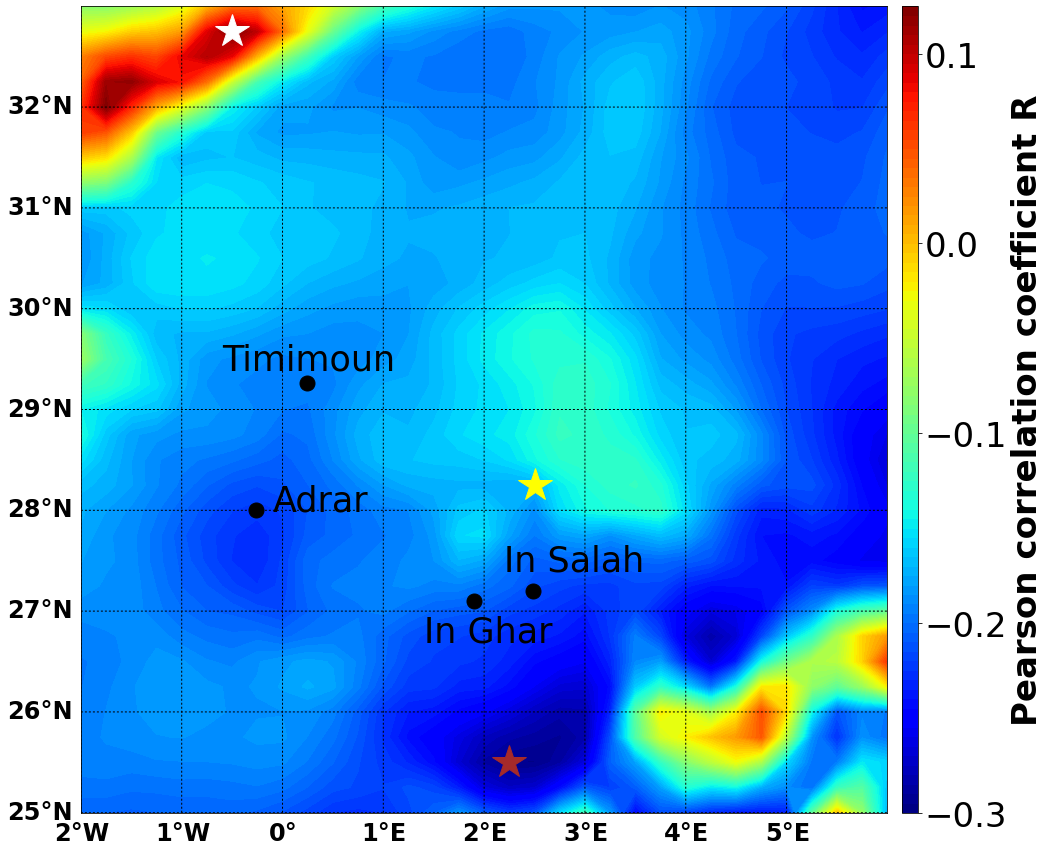

In [18]:
#In Salah

plt.figure(figsize=(15,15))
m = Basemap(projection='cyl',llcrnrlat=25.,urcrnrlat=33.,llcrnrlon=-2.,urcrnrlon=6.,\
            #lat_1=20.,lat_2=40.,lat_0=30.,lon_0=232.
            resolution ='h',area_thresh=1000.)
#m.drawcoastlines()
#m.drawcountries()
#m.drawstates()
#m.drawmapboundary()
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(25,33,1),dashes=[2,2],labels=[1,0,0,0],fontsize=24, fontweight='bold')
m.drawmeridians(np.arange(-2,6,1),dashes=[2,2],labels=[0,0,0,1],fontsize=24, fontweight='bold')
xpt,ypt = m(pearson_w_s.longitude,pearson_w_s.latitude)
#Q = m.quiver(xpt, ypt, xw.u10[0], xw.v10[0],latlon="True",color='blue',  width=0.002,  pivot='mid', units='inches'), #scale=32.)
#plt.quiverkey(Q, 0.85, 0.95, 10, label= '10 ms$^{-1}$',labelcolor='white',labelpos='E',\
#               coordinates='axes',fontproperties={'size': 18})
#m.streamplot(xpt, ypt, xwind.u10[0], xwind.v10[0],latlon="True",color='black',density = 10,linewidth=0.5)
X,Y = np.meshgrid(np.linspace(xpt[0],xpt[32],33),np.linspace(ypt[0],ypt[32],33))
#im1 = m.contourf(X,Y,xwind.u10[0],50,cmap='bwr',latlon="True",norm=MidpointNormalize(midpoint=0.))
im1 = m.contourf(X,Y,pearson_w_s,100,cmap=plt.cm.jet,latlon="True")
cb = m.colorbar(im1,"right",  size="2%", ticks=np.arange(-0.4, 0.8, 0.1), pad=0.2)
#cb = m.colorbar(im1,"right",  size="2%", ticks=np.arange(-0.4, 0.2, 0.1), pad=0.2)

#limit values
plt.plot(2.5, 28.25, '*',color='yellow',markersize=35) #the maxum mean wind speed
#plt.plot(5.5, 25.0, '*',color='black',markersize=10) # 
plt.plot(-0.5, 32.75, '*',color='white',markersize=35) #
plt.plot(2.25, 25.5, '*',color='brown',markersize=35) #the minimum pearson coefficient

#Cities
plt.plot(2.48, 27.2, 'o',color='black',markersize=15) #In Salah
plt.text(2.2, 27.4, 'In Salah', fontsize=35)
plt.plot(1.9, 27.10, 'o',color='black',markersize=15) #In Ghar
plt.text(1.4, 26.7, 'In Ghar', fontsize=35)
plt.plot(-0.26, 28, 'o',color='black',markersize=15) #Adrar
plt.text(-0.1, 28, 'Adrar', fontsize=35)
plt.plot(0.24, 29.26, 'o',color='black',markersize=15) #Timimun
plt.text(-0.6, 29.4, 'Timimoun', fontsize=35)

cb.set_label(r"Pearson correlation coefficient R", size=34, fontweight='bold')
cb.ax.tick_params(labelsize=34)
#plt.title('Geographic distribution of the Pearson correlation coefficient R between solar insolation and wind speed', size=20)
#print(s)
plt.show();